NOTE: RUN STOCK DATA FIRST. IT IS LAST FEW CHUNKS OF CODE

In [511]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
import sys
import os
import os

bs_data= pd.read_csv('bluesky_allkeywords.csv')
days = list(bs_data.columns)[1:]
td_data = pd.read_csv('bluesky_ticker.csv')

#Function to test if a date is a trading day
def is_trading_day(date):
    return date in stock_data.index


def next_trading_day(day):
    date = dt.datetime.strptime(day, '%Y-%m-%d')
    next_day = date + dt.timedelta(1)
    max_lookahead = 365  # prevent infinite loop going 1 year ahead
    count = 0
    while not is_trading_day(next_day):
        next_day += dt.timedelta(1)
        count += 1
        if count > max_lookahead:
            raise ValueError("No trading day found within 1 year from start date")
    return next_day.strftime('%Y-%m-%d')

for day in days:
   if is_trading_day(day) == False:
       bs_data[next_trading_day(day)] = bs_data[day] + bs_data[next_trading_day(day)]
       bs_data = bs_data.drop(columns=[day])
       td_data[day] = td_data[day] + td_data[next_trading_day(day)]
       td_data = td_data.drop(columns=[day])

sd =stock_data
print(sd)
match_stock_data = sd['2024-07-31': '2025-07-30']
match_sd_pct_change = match_stock_data.pct_change()
match_sd_pct_change = match_sd_pct_change.drop('2024-07-31')
bs_data= bs_data.drop(bs_data.columns[0], axis=1)
td_data = td_data.drop(td_data.columns[0], axis =1)
bs_data.index = sp500_tickers
td_data.index = sp500_tickers

Ticker             WMT        AMZN        AAPL        CVS        TSLA  \
Date                                                                    
2023-01-03   46.241455   85.820000  123.330635  83.524170  108.099998   
2023-01-04   46.292976   85.139999  124.602707  82.688118  113.639999   
2023-01-05   46.135189   83.120003  123.281342  81.312675  110.339996   
2023-01-06   47.265465   86.080002  127.817368  82.346512  113.059998   
2023-01-09   46.676178   87.360001  128.339996  82.247620  119.769997   
...                ...         ...         ...        ...         ...   
2025-09-25  103.050003  218.149994  256.869995  74.610001  423.390015   
2025-09-26  103.160004  219.779999  255.460007  75.769997  440.399994   
2025-09-29  103.080002  222.169998  254.429993  75.570000  443.209991   
2025-09-30  103.059998  219.570007  254.630005  75.389999  444.720001   
2025-10-01  101.959999  220.630005  255.449997  76.870003  459.459991   

Ticker           GOOGL        META         JPM    

In [534]:
# X = # social media posts about a company, Y = daily stock return
import matplotlib.pyplot as plt
company = 'TGT'
x = match_sd_pct_change
y=bs_data.T


day_forward =  stock_data['2024-08-01': '2025-07-31']
pct_day_forward = day_forward.pct_change()
pct_day_forward = pct_day_forward.drop('2024-08-01')
x2= pct_day_forward

wv = weekly_variance
week_after = wv['2024-08-08': '2025-08-06']
x3 = week_after
month_after = monthly_variance['2024-09-01': '2025-09-03']
x4 = month_after

print(y[:-1].shape)


(248, 50)


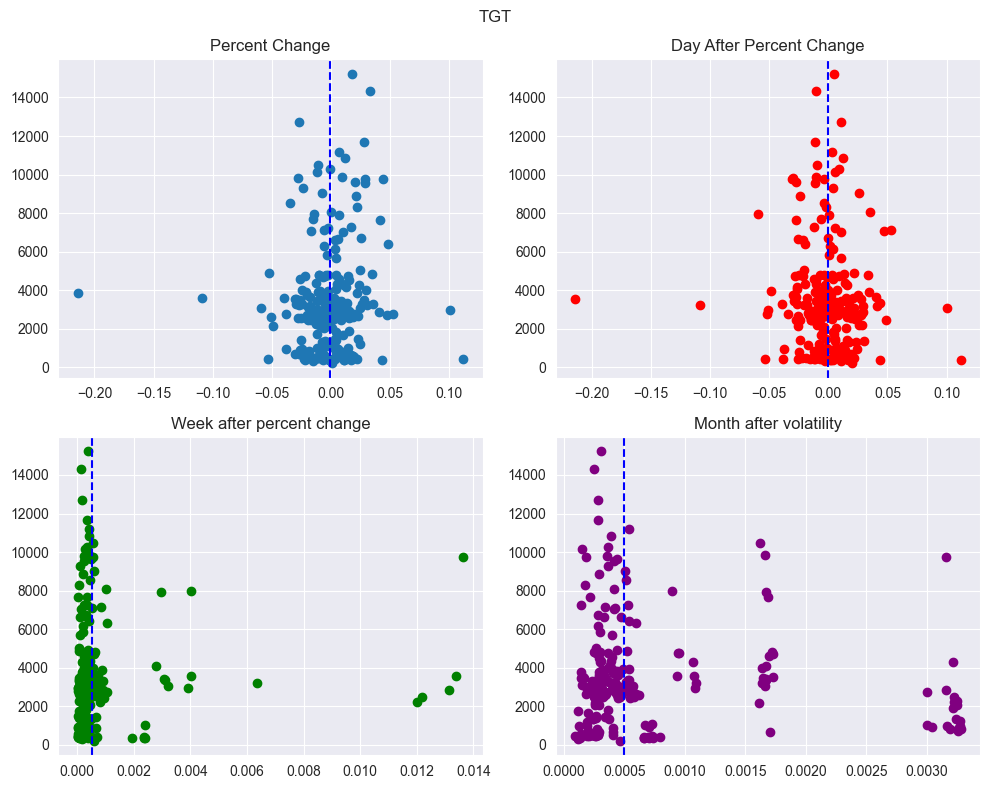

In [537]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
fig.suptitle(company)
# Plot 1
axs[0, 0].scatter(x[company], y[company])
axs[0, 0].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 0].set_title('Percent Change')

# Plot 2
axs[0, 1].scatter(x2[company], y[company], color = 'red')
axs[0, 1].axvline(x=av_pct_change[company], color='b', linestyle='--', label = "super average")
axs[0, 1].set_title('Day After Percent Change')

# Plot 3
axs[1, 0].scatter(x3[company], y[company], color = 'green')
axs[1, 0].axvline(x=av_weekly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 0].set_title('Week after percent change')


# Plot 4
axs[1, 1].scatter(x4[company], y[:-1][company], color = 'purple')
axs[1, 1].axvline(x=av_monthly_variance[company], color='b', linestyle='--', label = "super average")
axs[1, 1].set_title('Month after volatility')

plt.tight_layout()
plt.show()


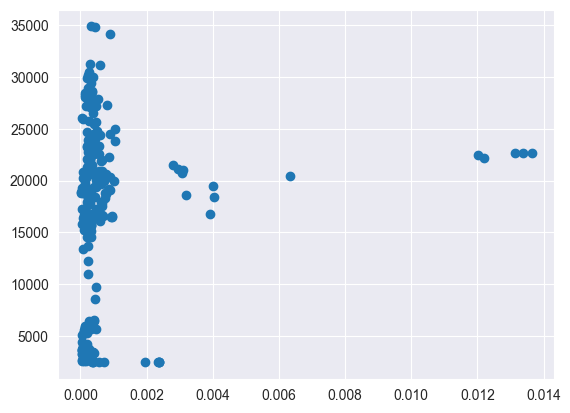

In [540]:
#Experiment with weekly counts of posts vs weekly variance
bs_weekly = bs_data.T.rolling(window=5).sum()
bs_weekly = bs_weekly.iloc[4:]
instant_weekly = weekly_variance['2024-08-07': '2025-07-30']
y2 = bs_weekly
z = instant_weekly

plt.scatter(z[company],y2[company])





In [ ]:
#Stock data 
#RUN FIRST THEN TRY NOT TO TOUCH AFTER RUNNING
sns.set_style('darkgrid')
import yfinance as yf

sp500_tickers = ["WMT", "AMZN", "AAPL", "CVS", "TSLA", "GOOGL", "META", "JPM", "COST", "KR",
"WBA", "TGT", "UPS", "CNC", "CI", "MSFT", "VZ", "IBM", "UNH", "XOM",
"MCK", "CVX", "CAH", "HD", "WBA", "MPC", "COR", "F", "C", "DELL",
"GM", "NVDA", "PFE", "PG", "CMCSA", "JNJ", "WFC", "BAC", "ABBV", "SBUX",
"CSCO", "T", "PEP", "INTC", "DIS", "BA", "GS", "MS", "HON", "CRM"
]

# Get the data for tickers from yahoo finance

# Download Close price data for tickers
stock_data_unordered = yf.download(sp500_tickers, '2023-01-01', '2025-10-02', auto_adjust=True)['Close']

# Download S&P 500 index data
SP500 = yf.download('^GSPC', '2023-01-01', '2025-10-02', auto_adjust=True)['Close']

# Transpose stock data so tickers are row index
stock_data_unordered = stock_data_unordered.T

# Reorder rows by original ticker list order
stock_data = stock_data_unordered.loc[sp500_tickers]
stock_data = stock_data.T


[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#log returns
log_returns= np.log(stock_data/stock_data.shift(1)).dropna()
SP_log_returns = np.log(SP500/SP500.shift(1)).dropna()

#Percentage change in stock returns day-to-day (in lieu of trading day variance)
SP_pct_change = SP500.pct_change().dropna()
sd2 = stock_data
pct_change = sd2.pct_change().dropna()
#print(pct_change)
#variance of stock returns over each week in the period (5 trading days) 
SP_weekly_variance = SP_log_returns.rolling(window=5).var().dropna()
weekly_variance = log_returns.rolling(window=5).var().dropna()

#variance of stock returns over each month in the period (21 trading days)
SP_monthly_variance = SP_log_returns.rolling(window=21).var().dropna()
monthly_variance = log_returns.rolling(window=21).var()
print(monthly_variance)
#variance of stock returns over each 2 weeks in the period (10 trading days)
SP_biweekly_variance = SP_log_returns.rolling(window=10).var().dropna()
biweekly_variance = log_returns.rolling(window=10).var().dropna()





#super averages
#average percent change in a single day
Av_SP_pct_change = SP_pct_change.mean()
transpose_pct_change = pct_change.T
av_pct_change = transpose_pct_change.mean(axis=1)
#print(av_pct_change)

#average weekly variance
av_weekly_variance = weekly_variance.mean()
Av_SP_weekly_variance = SP_weekly_variance.T.mean()
#average monthly variance
transpose_monthly = monthly_variance
av_monthly_variance = transpose_monthly.mean()
print(av_monthly_variance)
Av_SP_monthly_variance = SP_monthly_variance.T.mean()
#average biweekly variance
av_biweekly_variance = biweekly_variance.mean()
Av_SP_biweekly_variance = SP_biweekly_variance.T.mean()


#Note: variance windows are in trading days, not calendar days. Moreover, these are backwards looking rolling variances.


Ticker           WMT      AMZN      AAPL       CVS      TSLA     GOOGL  \
Date                                                                     
2023-01-04  0.001114 -0.007955  0.010261 -0.010060  0.049979 -0.011738   
2023-01-05 -0.003414 -0.024012 -0.010661 -0.016774 -0.029469 -0.021575   
2023-01-06  0.024204  0.034992  0.036133  0.012634  0.024352  0.013138   
2023-01-09 -0.012546  0.014760  0.004081 -0.001202  0.057655  0.007756   
2023-01-10 -0.000621  0.028327  0.004446 -0.009224 -0.007711  0.004534   
...              ...       ...       ...       ...       ...       ...   
2025-08-22 -0.011602  0.030571  0.012637 -0.001822  0.060310  0.031246   
2025-08-25 -0.007880 -0.003941 -0.002638 -0.001263  0.019196  0.011578   
2025-08-26 -0.000208  0.003372  0.009420  0.004763  0.014522 -0.006496   
2025-08-27  0.000312  0.001791  0.005133  0.005297 -0.005904  0.001640   
2025-08-28  0.000312  0.010766  0.008941  0.002915 -0.010409  0.019852   

Ticker          META       JPM      C

C:\Users\Thisu\AppData\Local\Temp\ipykernel_5772\1562246294.py:8: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = sd2.pct_change().dropna()
